region_1 median 1st= 0.03884583727191643 median 2nd= 0.1085852327264441
region_2 median 1st= 0.030742861132967078 median 2nd= 0.2286394523399734
region_3 median 1st= 0.0030752922453614246 median 2nd= 0.022650613588471227
region_1 median 1st= 0.09429403651501286 median 2nd= 0.11273772515411982
region_2 median 1st= 0.05915302718916947 median 2nd= 0.12955082050133074
region_3 median 1st= 0.02921014324591289 median 2nd= 0.06516639859068628


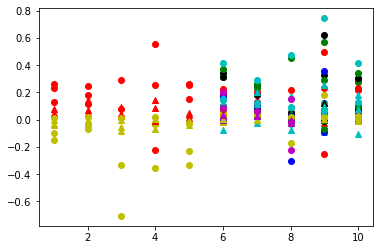

In [95]:
#SBuzzard created 03/04/21 during CMIP6 hackathon
#Data downloaded from: https://github.com/cmip6moap/project01

#Antarctica Ice data from GRL paper

import netCDF4 as nc
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

fp='project01_main/data/raw_data/GRL_paper_data/AIS/Ice/'

#Variables are time, limnsw_total_antarctica (Gt),limnsw_sector_# (#is 1 to 15), limnsw_region_# (#is 1 to 3)
#Dimensions are time, size 86
#for var in ds.variables.values():
#    print(var)
#for dim in ds.dimensions.values():
#    print(dim)
#Region 1 is WAIS, 2 is EAIS and 3 is AP
#Experiments relation to ssps posted in Slack by Issy at 10:13 04/06 2 and 7 are ssp 126, rest are 585
plot_colours=['r','b','k','g','y','c','m']

for region in ('region_1', 'region_2', 'region_3'):
    median_a=[]
    median_b=[]
    colour=0
    for model in ('AWI_PISM1','ILTS_PIK_SICOPOLIS1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM', 'VUB_AISMPALEO'):
        for exp in (1,3,4,5,6,8,9,10):
            data_file=Path(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if data_file.is_file(): #check file exists
                ds = nc.Dataset(data_file)
                limnsw_a=ds['limnsw_'+region][:35]
                limnsw_b=ds['limnsw_'+region][35:]
                time=ds['time'][:]
                #print(model, exp, np.mean(limnsw_a)/(361*35), np.mean(limnsw_b)/(361*51))
                #361 is standard value to convert Gt to mm of slr, dividing by #years to get slr rate
                plt.scatter(exp,np.mean(limnsw_a)/(361*35),marker='^',c=plot_colours[colour])
                plt.scatter(exp,np.mean(limnsw_b)/(361*51),marker='o',c=plot_colours[colour]) 
                median_a.append(np.mean(limnsw_a)/(361*35))
                median_b.append(np.mean(limnsw_b)/(361*51))
        colour=colour+1
   # plt.show()
    print (region, 'median 1st=', np.median(median_a), 'median 2nd=', np.median(median_b))

for region in ('region_1', 'region_2', 'region_3'):
    median_a=[]
    median_b=[]
    colour=0
    for model in ('AWI_PISM1','ILTS_PIK_SICOPOLIS1','JPL1_ISSM','LSCE_GRISLI','NCAR_CISM', 'UCIJPL_ISSM', 'VUB_AISMPALEO'):
        for exp in (2,7):
            data_file=Path(fp+'computed_limnsw_minus_ctrl_proj_AIS_'+model+'_expB'+str(exp)+'.nc')
            if data_file.is_file(): #check file exists
                ds = nc.Dataset(data_file)
                limnsw_a=ds['limnsw_'+region][:35]
                limnsw_b=ds['limnsw_'+region][35:]
                time=ds['time'][:]
                #print(model, exp, np.mean(limnsw_a)/(361*35), np.mean(limnsw_b)/(361*51))
                #361 is standard value to convert Gt to mm of slr, dividing by #years to get slr rate
                plt.scatter(exp,np.mean(limnsw_a)/(361*35),marker='^',c=plot_colours[colour])
                plt.scatter(exp,np.mean(limnsw_b)/(361*51),marker='o',c=plot_colours[colour]) 
                median_a.append(np.mean(limnsw_a)/(361*35))
                median_b.append(np.mean(limnsw_b)/(361*51))
        colour=colour+1
   # plt.show()
    print (region, 'median 1st=', np.median(median_a), 'median 2nd=', np.median(median_b))


<ipython-input-99-2515ab856998>:25: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  limnsw_a=ds['sle'][:35]
<ipython-input-99-2515ab856998>:26: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  limnsw_b=ds['sle'][35:]


median 1st= -0.255010010940688 median 2nd= -2.1106104765619547


<ipython-input-99-2515ab856998>:48: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  limnsw_a=ds['sle'][:35]
<ipython-input-99-2515ab856998>:49: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  limnsw_b=ds['sle'][35:]


median 1st= -0.21884623648864882 median 2nd= -0.8806884022695677


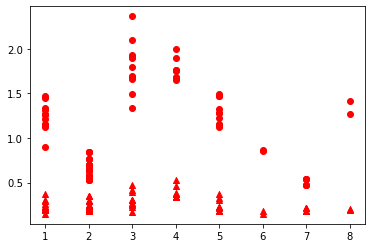

In [99]:
#GRL paper Greenland

fp='project01_main/data/raw_data/GRL_paper_data/GrIS/Ice/'

#ds=nc.Dataset(fp+'scalars_mm_cr_GIS_NCAR_CISM_expb02.nc')
#for var in ds.variables.values():
#    print(var)
#Variables are smb, sle, limgr, limfl, limaf, lim, involgr, ivol, ivaf, iareagr, iareafl, iarea, dx, dy, oarea, rhof...
#sle is sea level equivalent ice mass in m
#Dimensions are time, size 86

#GRL rates need to be multiplied by -1 (in the readme!)

#ssp585

plot_colours=['r','b','k','g','y','c','m']
colour=0
median_a=[]
median_b=[]
for model in ('AWI_ISSM1','AWI_ISSM2','AWI_ISSM3','BGC_BISICLES','GSFC_ISSM', 'ILTS_PIK_SICOPOLIS2', 'ILTS_PIK_SICOPOLIS3', 'IMAU_IMAUICE2', 'JPL_ISSM', 'LSCE_GRISI2', 'NCAR_CISM', 'UAF_PISM1', 'UAF_PISM2', 'UCIJPL_ISSM1', 'VUB_GISMHOMv1'):
    for exp in (1,3,4,5,6,8,9,10):
        data_file=Path(fp+'scalars_mm_cr_GIS_'+model+'_expb0'+str(exp)+'.nc')
        if data_file.is_file(): #check file exists
            ds = nc.Dataset(data_file)
            limnsw_a=ds['sle'][:35]
            limnsw_b=ds['sle'][35:]
            time=ds['time'][:]
            #print(model, exp, np.mean(limnsw_a)/(35/1000)*-1, np.mean(limnsw_b)/(51/1000)*-1)
            plt.scatter(exp,np.mean(limnsw_a)/(35/1000)*-1,marker='^',c=plot_colours[colour])
            plt.scatter(exp,np.mean(limnsw_b)/(51/1000)*-1,marker='o',c=plot_colours[colour]) 
            median_a.append(np.mean(limnsw_a)/(35/1000))
            median_b.append(np.mean(limnsw_b)/(35/1000))
    #colour=colour+1
#plt.show()
print ('median 1st=', np.median(median_a), 'median 2nd=', np.median(median_b))

#ssp126
median_a=[]
median_b=[]
colour=0
for region in ('region_1', 'region_2', 'region_3'):
    colour=0
    for model in ('AWI_ISSM1','AWI_ISSM2','AWI_ISSM3','BGC_BISICLES','GSFC_ISSM', 'ILTS_PIK_SICOPOLIS2', 'ILTS_PIK_SICOPOLIS3', 'IMAU_IMAUICE2', 'JPL_ISSM', 'LSCE_GRISI2', 'NCAR_CISM', 'UAF_PISM1', 'UAF_PISM2', 'UCIJPL_ISSM1', 'VUB_GISMHOMv1'):
        for exp in (2,7):
            data_file=Path(fp+'scalars_mm_cr_GIS_'+model+'_expb0'+str(exp)+'.nc')
            if data_file.is_file(): #check file exists
                ds = nc.Dataset(data_file)
                limnsw_a=ds['sle'][:35]
                limnsw_b=ds['sle'][35:]
                time=ds['time'][:]
                #print(model, exp, np.mean(limnsw_a)/(35/1000)*-1, np.mean(limnsw_b)/(51/1000)*-1)
                plt.scatter(exp,np.mean(limnsw_a)/(35/1000)*-1,marker='^',c=plot_colours[colour])
                plt.scatter(exp,np.mean(limnsw_b)/(51/1000)*-1,marker='o',c=plot_colours[colour])
                median_a.append(np.mean(limnsw_a)/(35/1000))
                median_b.append(np.mean(limnsw_b)/(35/1000))
        #colour=colour+1
    #plt.show()

print ('median 1st=', np.median(median_a), 'median 2nd=', np.median(median_b))

    
    

ssp585 CESM2 13.3116
ssp585 CNRM-CM6-1 0.737962
ssp585 CNRM-ESM2-1 13.6174
ssp585 HadGEM2-ES -11.2644
ssp585 UKESM1-0-LL -1.087
ssp126 CNRM-CM6-1 0.735315


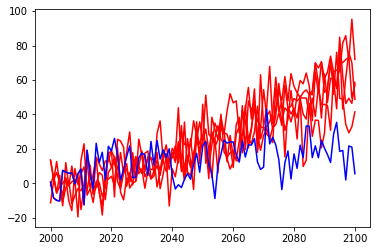

ssp585 CESM2 -98.26973724365234
ssp585 CNRM-CM6 -11.046070098876953
ssp585 CNRM-ESM2 -27.074953079223633
ssp585 UKESM1-CM6 -9.706483840942383
ssp126 CNRM-CM6 -11.046070098876953


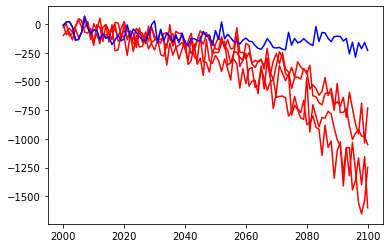

In [43]:
#Atmos data- SMB anomaly- this is forcing
fp='project01_main/data/raw_data/GRL_paper_data/'

#Variables are time (1950 to 2100) and smb anomaly (smbanom), Dimensions are time, size 151

#for var in ds.variables.values():
#    print(var)
#for dim in ds.dimensions.values():
#    print(dim)
    

#Checking hypotheses SMB response is linear
#ssp585, ssp126
#CESM2, CNRM-CM6-1, CNRM-ESM2-1, HadGEM2-ES, UKESM1-0-LL

#How were these translated into ice sheet models?

#AIS
for ssp in ('ssp585','ssp126'):
    for model in ('CESM2', 'CNRM-CM6-1','CNRM-ESM2-1', 'HadGEM2-ES', 'UKESM1-0-LL'):
        data_file=Path(fp+'AIS/Atmosphere/smb_AIS_'+model+'_'+ssp+'.nc')
        if data_file.is_file(): #check file exists
            ds = nc.Dataset(data_file)
            smb=ds['smbanom'][50:]
            time=ds['time'][50:]
            print(ssp, model, smb[0])
            if ssp=='ssp126':
                plt.plot(time,smb,'b')
            else:
                plt.plot(time,smb,'r')
                
plt.show()

#GRIS

for ssp in ('ssp585','ssp126'):
    for model in ('CESM2', 'CNRM-CM6','CNRM-ESM2', 'HadGEM2-ES', 'UKESM1-CM6'):
        data_file=Path(fp+'GRIS/Atmosphere/smb_GrIS_'+model+'_'+ssp+'.nc')
        if data_file.is_file(): #check file exists
            ds = nc.Dataset(data_file)
            smb=ds['smbanom'][50:]
            time=ds['time'][50:]
            print(ssp, model, smb[0])
            if ssp=='ssp126':
                plt.plot(time,smb,'b')
            else:
                plt.plot(time,smb,'r')
                
plt.show()
            
            
            

            
            
        
